# Bdaav College - Pandas: groeperen, plotten en andere mogelijkheden

We openen weer het bestand *ufo_sightings.csv*. We importeren ook alvast NumPy en MatPlotLib, omdat we dat later nodig hebben.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ufos = pd.read_csv('ufo_sightings.csv')
ufos.head(5)

,datetime,city,state,country,shape,duration,comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


We hebben inmiddels geleerd hoe we een DataFrame kunnen filteren met ```loc[]```. Nu volgen extra functies en meer geavanceerde voorbeelden. Om te beginnen willen we gaan kijken naar alle UFO sightings die in de Verenigde Staten hebben plaatsgevonden. We weten al hoe dit moet:

In [2]:
ufos_us = ufos.query("country == 'us'")
# Of: ufos_us = ufos[ufos['country']=='us']

Nu willen we deze data groeperen op 'state'. Hiervoor gebruiken we de methode ```groupby```. Dit creëert een ```groupby``` object:

In [3]:
grouped_by_state = ufos_us.groupby('state')
type(grouped_by_state)

pandas.core.groupby.generic.DataFrameGroupBy

Met deze gegroepeerde data kunnen we nu verschillende dingen doen. We kunnen bijvoorbeeld aggregate functions gebruiken. Als we bijvoorbeeld het aantal incidenten per staat willen zien:

Er is een goede integratie van MatPlotLib met Pandas, waardoor je met simpele statements al grafieken kan maken:

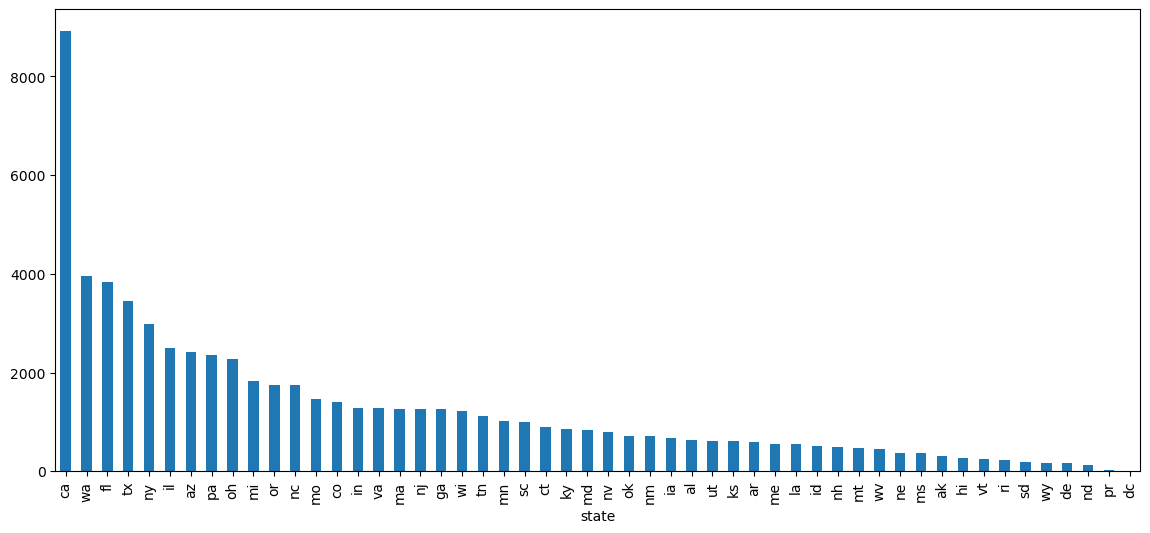

In [4]:
plt.figure(figsize=(14,6))
grouped_by_state['state'].agg('count').sort_values(ascending=False).plot.bar()
# Als je maar 1 ding via aggregate wil berekenen, is er vaak een korter alternatief.
# Onderstaande code geeft dezelfde output:
# grouped_by_state['state'].size().sort_values(ascending=False).plot.bar()
plt.show()

Nog een voorbeeld: de gemiddelde duur van een incident, gegroepeerd op 'shape':

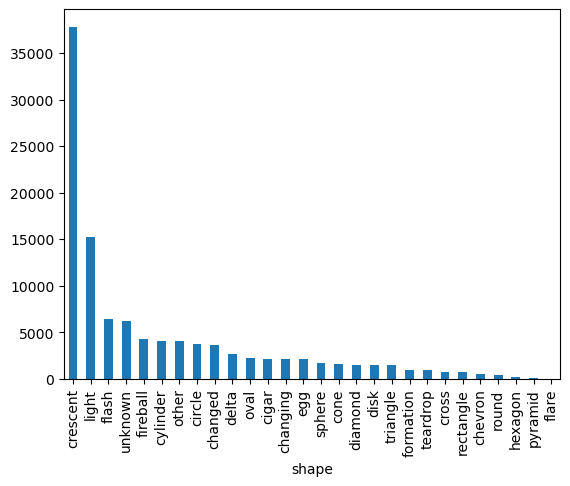

In [5]:
grouped_by_shape = ufos_us.groupby('shape')
grouped_by_shape['duration'].agg('mean').sort_values(ascending=False).plot.bar()
#Of: grouped_by_shape['duration'].mean().sort_values(ascending=False).plot.bar()
plt.show()

Je kan ook op meerdere dingen groeperen en meerdere dingen aggregeren:

In [6]:
groups = ufos.groupby(['country', 'shape'])
groups['duration'].agg(['mean', 'min', 'max', 'count'])

mean    min         max  count
country shape                                          
au      changing  5622.888889   6.00     37800.0      9
        chevron    120.000000  60.00       180.0      3
        cigar      521.800000   5.00      3600.0     15
        circle    1096.629032   3.00     18000.0     62
        cone       310.000000  60.00       600.0      6
...                       ...    ...         ...    ...
us      round      452.500000   5.00       900.0      2
        sphere    1737.741189   0.50   1209600.0   4347
        teardrop   939.632601   0.50    172800.0    592
        triangle  1447.421929   0.01   2631600.0   6549
        unknown   6233.483884   0.20  10526400.0   4567

[110 rows x 4 columns]

Hier een voorbeeld van het 'binnen' van waardes. De grafiek toont het aantal ufo sightings verdeeld over 50 bins van longitude waardes. Onderstaande afbeelding kan helpen bij de interpretatie van de grafiek.

<img style="float: left;" src="map.gif">

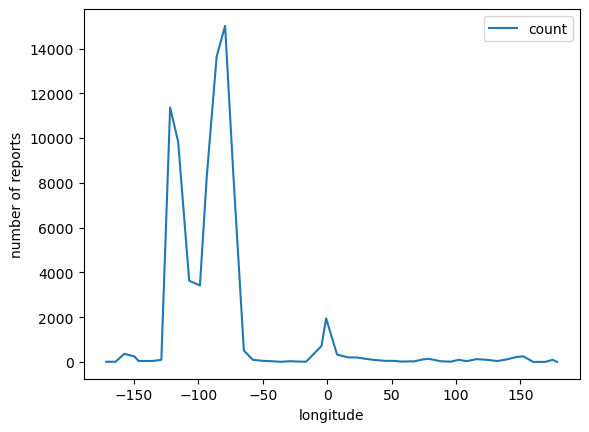

In [7]:
bins = np.linspace(ufos['longitude'].min(), ufos['longitude'].max(), 50)
groups = ufos.groupby(np.digitize(ufos['longitude'], bins))
groups['longitude'].agg(['mean', 'count']).set_index('mean').plot()
plt.xlabel('longitude')
plt.ylabel('number of reports')
plt.show()